In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString, Point
import math
import re
import numpy as np
from heapq import heappush, heappop
import networkx as nx
from itertools import permutations

In [2]:
# Data Preparation
data_x = {
    "Point": [
        "Start", 2618, 5662, "End"
    ],
    "Latitude": [
        53.49, 53.23946428739349, 53.06532601857299, 52.98485
    ],
    "Longitude": [
        -2.25, -2.335034109499439, -2.2089309462982634, -2.27032
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 24 minutes 9 seconds", 
        "0 days 0 hours 17 minutes 53 seconds", "0 days 0 hours 8 minutes 36 seconds"
    ],
    "Avg Speed": [
        0, 69.48197367330529, 69.30009076778624, 68.68124444904674
    ],
    "Distance": [
        0, 28.423914295792443, 21.110318323633713, 9.845445412628182
    ],
    "Wind Speed": [
        "-", 2.68, 2.68, 2.68
    ],
    "Wind Direction": [
        "-", 108, 108, 108
    ],
    "Battery Left": [
        "-", 26.032186497212887, 35.66267543189187, 74.43680308933571
    ]
}

data_y = {
    "Point": [
        "Start", 1973, 2335, 599, 24, 1600, 3728, 2038, 5772, 4814, 4731, 7465, 2464, 902, 8427, "End"
    ],
    "Latitude": [
        55.953, 55.846200704448485, 55.68714929217446, 55.55657394604759, 
        55.45274395573584, 55.22033414997413, 55.09788991362563, 
        54.86544035165556, 54.65453981880042, 54.5124172728162, 
        54.361373008443955, 54.1846758953888, 53.97865480643307, 
        53.86076924964234, 53.645975848325435, 53.49
    ],
    "Longitude": [
        -3.191, -3.233065003496521, -3.152069318399036, -3.069139841633005, 
        -2.986937896945639, -2.8723048127657567, -2.699583930567485, 
        -2.700680012339909, -2.6348272570309037, -2.6293083044973766, 
        -2.5184645566022876, -2.5415860988263654, -2.6308405144193463, 
        -2.656252689297168, -2.460270624567931, -2.25
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 10 minutes 14 seconds", 
        "0 days 0 hours 15 minutes 31 seconds", "0 days 0 hours 13 minutes 0 seconds", 
        "0 days 0 hours 10 minutes 37 seconds", "0 days 0 hours 22 minutes 47 seconds", 
        "0 days 0 hours 14 minutes 48 seconds", "0 days 0 hours 21 minutes 56 seconds", 
        "0 days 0 hours 20 minutes 12 seconds", "0 days 0 hours 13 minutes 19 seconds", 
        "0 days 0 hours 15 minutes 25 seconds", "0 days 0 hours 16 minutes 40 seconds", 
        "0 days 0 hours 20 minutes 4 seconds", "0 days 0 hours 11 minutes 8 seconds", 
        "0 days 0 hours 23 minutes 1 seconds", "0 days 0 hours 19 minutes 12 seconds"
    ],
    "Avg Speed": [
        0, 68.77663505513863, 69.19368965217056, 69.03676240943481, 
        68.81994066037859, 69.45061110767774, 69.15457364099558, 
        69.42938542210098, 69.38032896295988, 69.05955014861645, 
        69.18803129438196, 69.24872017390351, 69.37633588690369, 
        68.87563378305283, 69.45631479302894, 69.40939070981055
    ],
    "Distance": [
        0, 12.161630085996466, 18.39714487953959, 15.424711036372134, 
        12.652768269472825, 26.84040852987764, 17.48604552290924, 
        25.847306612607458, 23.82863749927303, 15.8073071802628, 
        18.261139065399078, 19.705093708671658, 23.63675173197674, 
        13.213483615245044, 27.137832488097377, 22.21720340100267
    ],
    "Wind Speed": [
        "-", 6.69, 0.45, 0.45, 6.22, 5.84, 7.2, 3.58, 5.15, 6.8, 
        6.44, 4.53, 3.71, 4.22, 0.89, 3.09
    ],
    "Wind Direction": [
        "-", 220, 208, 195, 209, 207, 220, 196, 195, 218, 
        237, 250, 185, 188, 205, 220
    ],
    "Battery Left": [
        "-", 72.62909711123477, 50.133631033088385, 54.75968843968528, 
        61.59308094622405, 22.076501256749737, 42.92522954676473, 
        37.49196343243434, 29.580834217253642, 54.68983774170408, 
        47.39121479700312, 57.30136417985143, 45.74766655062982, 
        62.03287126724612, 11.896781512938604, 25.625000279218337
    ]
}

data3 = {
    "Point": [
        "Start", 1825, 1821, 8670, 1125, 3660, 626, 1360, 5819, 126, 2597, 4534, 3733, 419, "End"
    ],
    "Latitude": [
        53.49, 53.2597348907701, 53.21408450945209, 53.132692832393474, 52.95298239036829, 
        52.835768710523624, 52.70204585174369, 52.56283948035825, 52.410963816536864, 
        52.35079713206578, 52.1819878577974, 52.087215223218976, 51.90090840203291, 
        51.715469169511415, 51.5
    ],
    "Longitude": [
        -2.25, -2.106117691658813, -1.8125330949486038, -1.700954993659633, 
        -1.5230341187694378, -1.4484306787417793, -1.2138449007730667, 
        -1.1062249774532757, -0.9295634075280299, -0.811328498202359, 
        -0.6844964051387628, -0.6727365380638632, -0.5140920158826354, 
        -0.2781763150137291, -0.15
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 23 minutes 12 seconds", 
        "0 days 0 hours 17 minutes 10 seconds", "0 days 0 hours 9 minutes 48 seconds", 
        "0 days 0 hours 19 minutes 41 seconds", "0 days 0 hours 11 minutes 45 seconds", 
        "0 days 0 hours 18 minutes 23 seconds", "0 days 0 hours 14 minutes 25 seconds", 
        "0 days 0 hours 17 minutes 30 seconds", "0 days 0 hours 8 minutes 46 seconds", 
        "0 days 0 hours 17 minutes 29 seconds", "0 days 0 hours 8 minutes 51 seconds", 
        "0 days 0 hours 19 minutes 49 seconds", "0 days 0 hours 22 minutes 15 seconds", 
        "0 days 0 hours 22 minutes 3 seconds"
    ],
    "Avg Speed": [
        0, 69.46066495827723, 69.271114810419, 68.72262800759235, 69.36431950629208, 
        68.93407707049994, 69.3189273401977, 69.13148882279029, 69.28469571106888, 
        68.57075514204811, 69.28401520997464, 68.58436622338017, 69.36858666949153, 
        69.43749357749884, 69.48570948999009
    ],
    "Distance": [
        0, 27.32544290013056, 20.1869575177186, 11.713768951087149, 23.254946898063178, 
        13.961360215993668, 21.683394280285295, 17.098277429440813, 20.695086266397436, 
        10.448053135108637, 20.659952707202144, 10.568758196764412, 23.391246616923464, 
        26.234557047559413, 25.54182453543089
    ],
    "Wind Speed": [
        "-", 2.06, 5.03, 4.95, 4.17, 4.63, 5.14, 4.7, 3.13, 2.68, 4.69, 0.89, 3.09, 3.09, 3.6
    ],
    "Wind Direction": [
        "-", 200, 224, 227, 227, 210, 200, 225, 217, 217, 233, 199, 220, 220, 240
    ],
    "Battery Left": [
        "-", 22.116705101753272, 34.6452023905261, 65.16440909808989, 33.64765731675337, 
        61.8761983077702, 29.869003772090966, 46.734988578594425, 39.27608812620262, 
        67.9006318210986, 40.08903335253572, 73.92978780664343, 30.19352011344841, 
        21.497351788017134, 27.103128665153367
    ]
}

data4 = {
    "Point": [
        "Start", 935, 5161, 5852, 304, 4746, 651, 2404, 387, 1017, 9283, 
        334, 4947, 3249, 412, 253, 2799, 1825, 5662, 2269, 3837, 941, 
        827, 7568, 3679, 4081, 454, 4512, 6191, 1770, 452, 699, 782, "End"
    ],
    "Latitude": [
        55.86029, 55.74634852507462, 55.60884323212862, 55.49543935494863, 
        55.337677876809074, 55.18730490506853, 55.050347759165895, 
        54.87885481335387, 54.703851742746124, 54.460012119060956, 
        54.343704746507946, 54.24026402699399, 54.12229389404159, 
        53.938657046528306, 53.813763150681595, 53.60290927711701, 
        53.4506194184933, 53.2597348907701, 53.06532601857299, 
        52.97017065487948, 52.84670269006989, 52.71697867981222, 
        52.645770256352826, 52.5061354457665, 52.37076006212805, 
        52.257701988463225, 52.061473459103844, 51.84260722488872, 
        51.66232523737515, 51.5423490164423, 51.31650756318197, 
        51.22895099661824, 51.029119212369885, 50.82963
    ],
    "Longitude": [
        -4.25, -4.117396343868701, -4.060494574307324, -3.941694410222885, 
        -3.7230645529286495, -3.6924435346267845, -3.5876824680071735, 
        -3.373269606024623, -3.167904338803554, -3.058328612948994, 
        -2.8914561257756484, -2.714974253824624, -2.6626259402511376, 
        -2.4147904331362096, -2.268246469760454, -2.278210344601378, 
        -2.1124845394121152, -2.106117691658813, -2.2089309462982634, 
        -2.0605497393078824, -1.9623982668799753, -1.6774539593436515, 
        -1.5823595905610928, -1.4011317756434263, -1.2613293252172406, 
        -1.2075609156637839, -1.035437302653964, -0.9047462417080707, 
        -0.7518237422381358, -0.5663929548694595, -0.4482710234352485, 
        -0.5066408319388502, -0.33588980939464896, -0.14047
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 12 minutes 45 seconds",
        "0 days 0 hours 13 minutes 13 seconds", "0 days 0 hours 12 minutes 20 seconds",
        "0 days 0 hours 18 minutes 54 seconds", "0 days 0 hours 14 minutes 12 seconds",
        "0 days 0 hours 14 minutes 1 second", "0 days 0 hours 19 minutes 54 seconds",
        "0 days 0 hours 19 minutes 55 seconds", "0 days 0 hours 23 minutes 47 seconds",
        "0 days 0 hours 14 minutes 13 seconds", "0 days 0 hours 13 minutes 43 seconds",
        "0 days 0 hours 11 minutes 24 seconds", "0 days 0 hours 22 minutes 7 seconds",
        "0 days 0 hours 14 minutes 14 seconds", "0 days 0 hours 19 minutes 54 seconds",
        "0 days 0 hours 17 minutes 3 seconds", "0 days 0 hours 17 minutes 59 seconds",
        "0 days 0 hours 19 minutes 19 seconds", "0 days 0 hours 12 minutes 13 seconds",
        "0 days 0 hours 12 minutes 49 seconds", "0 days 0 hours 20 minutes 21 seconds",
        "0 days 0 hours 8 minutes 30 seconds", "0 days 0 hours 16 minutes 43 seconds",
        "0 days 0 hours 14 minutes 59 seconds", "0 days 0 hours 10 minutes 59 seconds",
        "0 days 0 hours 21 minutes 0 seconds", "0 days 0 hours 21 minutes 57 seconds",
        "0 days 0 hours 19 minutes 11 seconds", "0 days 0 hours 15 minutes 38 seconds",
        "0 days 0 hours 22 minutes 24 seconds", "0 days 0 hours 8 minutes 53 seconds",
        "0 days 0 hours 21 minutes 22 seconds", "0 days 0 hours 22 minutes 30 seconds"
    ],
    "Avg Speed": [
        0, 69.01858897787685, 69.05338118555683, 68.98550499934845, 
        69.33781763301968, 69.11889369651482, 69.10726464438017, 
        69.37111339967028, 69.37165758569273, 69.47374207135545, 
        69.1194153928499, 69.08721420461237, 68.90142434981497, 
        69.43422436916663, 69.12086070707815, 69.3711042707145, 
        69.26583713019427, 69.30420783229296, 69.35204434592423, 
        68.97558820547462, 69.02375538106384, 69.38512853166112, 
        68.52662717259129, 69.25125023896923, 69.1649019955286, 
        68.8599166272544, 69.40391985838538, 69.42988052976861, 
        69.34748749720062, 69.1992640896947, 69.44122845377203, 
        68.58972606369942, 69.41429892491178, 69.49603635642823
    ],
    "Distance": [
        0, 15.139286529007778, 15.700584019446024, 14.657613456787212, 
        22.318988981238068, 16.83289787907912, 16.62224694756909, 
        23.47267946186857, 23.49494172872917, 28.018118753129816, 
        16.849888889215514, 16.23212980443518, 13.552777262038514, 
        26.05670203826109, 16.88629487559582, 23.455050225440477, 
        20.168139914205135, 21.229596599647515, 22.677890260989845, 
        14.507471039521526, 15.225296259881748, 23.98626377579531, 
        10.187686469742145, 19.774977010951, 17.787660185582872, 
        13.092030606673827, 24.77805427026221, 25.932578554346474, 
        22.64219821680803, 18.492925634615112, 26.41391390017347, 
        10.548666017604925, 25.213435279031657, 26.069555104279186
    ],
    "Wind Speed": [
        "-", 2.29, 2.19, 2.05, 1.37, 1.52, 1.38, 3.65, 2.81, 1.82, 
        2.12, 3.04, 0.45, 4.05, 3.94, 3.54, 3.09, 3.09, 1.79, 4.16, 
        4.47, 4.57, 4.54, 1.79, 4.79, 4.88, 0.89, 6.12, 0.45, 7.72, 
        5.66, 5.66, 5.66, 7.2
    ],
    "Wind Direction": [
        "-", 234, 217, 221, 280, 308, 284, 273, 256, 284, 
        272, 261, 354, 281, 278, 281, 250, 250, 283, 307, 
        311, 309, 297, 0, 277, 266, 332, 245, 292, 260, 240, 
        240, 240, 240
    ],
    "Battery Left": [
        "-", 55.35727652353421, 56.92022470717657, 57.10935430489312, 
        33.76789464005292, 53.61272664696332, 54.572084390781576, 
        34.87360516399908, 40.85827675661672, 27.047484474743786, 
        54.30992567743505, 55.58155170838265, 65.61549134501963, 
        23.904869133871035, 59.060133049653814, 44.033234129185956, 
        50.09566342406182, 46.17253527657189, 42.95404604701928, 
        58.78618635484281, 64.13476230228459, 44.409164492220825, 
        77.00364065236866, 54.53514031971467, 50.02672194748319, 
        70.44460596312057, 41.09530966824417, 25.818613374937975, 
        42.84749494679461, 46.51612582801393, 46.40507116395565, 
        78.62153347639472, 34.01551918334389, 30.150357551010348
    ]
}

data5 = {
    "Point": [
        "Start", 2799, 1825, 5662, "End"
    ],
    "Latitude": [
        53.49, 53.4506194184933, 53.2597348907701, 53.06532601857299, 52.98485
    ],
    "Longitude": [
        -2.25, -2.1124845394121152, -2.106117691658813, -2.2089309462982634, -2.27032
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds",
        "0 days 0 hours 8 minutes 24 seconds",
        "0 days 0 hours 17 minutes 59 seconds",
        "0 days 0 hours 19 minutes 13 seconds",
        "0 days 0 hours 8 minutes 36 seconds"
    ],
    "Avg Speed": [
        0, 68.50934063166937, 69.30388866181262, 69.34856790643087, 68.68124444904674
    ],
    "Distance": [
        0, 10.100394160843894, 21.229596599647515, 22.677890260989845, 9.845445412628182
    ],
    "Wind Speed": [
        "-", 2.57, 1.54, 0.89, 2.93
    ],
    "Wind Direction": [
        "-", 300, 300, 358, 276
    ],
    "Battery Left": [
        "-", 72.34405174795474, 44.13457547151049, 36.22899830736975, 72.27717359135725
    ],
    "Discharge Distance": [
        28, 28, 28, 29, 28
    ]
}

data6 = {
    "Point": [
        "Start", 2426, 599, 24, 1600, 831, 2038, 5772, 4814, 4731, 7465, 3249, 3537, "End"
    ],
    "Latitude": [
        55.953, 55.73696501189696, 55.55657394604759, 55.45274395573584, 55.22033414997413,
        54.961429942959626, 54.86544035165556, 54.65453981880042, 54.5124172728162, 
        54.361373008443955, 54.1846758953888, 53.938657046528306, 53.7365541052219, 53.49
    ],
    "Longitude": [
        -3.191, -2.9671087636292253, -3.069139841633005, -2.986937896945639, -2.8723048127657567,
        -2.78739336146191, -2.700680012339909, -2.6348272570309037, -2.6293083044973766, 
        -2.5184645566022876, -2.5415860988263654, -2.4147904331362096, -2.402725402107672, -2.25
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 23 minutes 37 seconds", 
        "0 days 0 hours 17 minutes 52 seconds", "0 days 0 hours 10 minutes 37 seconds", 
        "0 days 0 hours 22 minutes 47 seconds", "0 days 0 hours 24 minutes 53 seconds", 
        "0 days 0 hours 10 minutes 6 seconds", "0 days 0 hours 20 minutes 12 seconds", 
        "0 days 0 hours 13 minutes 19 seconds", "0 days 0 hours 15 minutes 25 seconds", 
        "0 days 0 hours 16 minutes 40 seconds", "0 days 0 hours 24 minutes 16 seconds", 
        "0 days 0 hours 19 minutes 3 seconds", "0 days 0 hours 25 minutes 11 seconds"
    ],
    "Avg Speed": [
        0, 69.47005872272372, 69.29954149283402, 68.81994066037859, 69.45061110767774, 
        69.49700422877864, 68.75986983335568, 69.38032896295988, 69.05955014861645, 
        69.18803129438196, 69.24872017390351, 69.4843611973882, 69.34312728741548, 69.54983810109552
    ],
    "Distance": [
        0, 27.79238895039296, 21.055471670221838, 12.652768269472825, 26.84040852987764, 
        29.291500486009355, 12.026758638004926, 23.82863749927303, 15.8073071802628, 
        18.261139065399078, 19.705093708671658, 28.58018522820165, 22.486760274965036, 29.207988577587226
    ],
    "Wind Speed": [
        None, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54, 1.54
    ],
    "Wind Direction": [
        None, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170
    ],
    "Battery Left": [
        None, 22.49097224218819, 42.93595635667372, 63.515820326149544, 24.255885850995696, 
        16.189015089103194, 67.52996897307673, 28.95431362504175, 53.429214543214606, 
        46.101966571666416, 50.00709012702664, 22.38104832637006, 40.352753450829105, 17.208865065005472
    ],
    "Discharge Distance": [
        29.844872216042507, 29.821075731828966, 29.794352109751337, 29.878546424445293, 
        29.835383166362135, 29.864852892073436, 29.825327176524453, 29.81936730321804, 
        29.8382389427044, 29.870189830945108, 29.90178004432659, 29.88904009811779, 
        30.03087039215138, 29.887172955668998
    ]
}



In [3]:
# Define the station and route data
data1 = { #Manchester to Stoke-on-Trent
    "Point": [
        "Start", 2618, 5662, "End"
    ],
    "Latitude": [
        53.49, 53.23946428739349, 53.06532601857299, 52.98485
    ],
    "Longitude": [
        -2.25, -2.335034109499439, -2.2089309462982634, -2.27032
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds",
        "0 days 0 hours 17 minutes 59 seconds",
        "0 days 0 hours 19 minutes 13 seconds",
        "0 days 0 hours 8 minutes 36 seconds"
    ],
    "Avg Speed": [
        0, 68.50934063166937, 69.30388866181262, 69.34856790643087
    ],
    "Distance": [
        0, 28.42391429579244, 21.110318323633717, 9.845445412628184
    ],
    "Wind Speed": [
        "-", 2.57, 1.54, 0.89
    ],
    "Wind Direction": [
        "-", 300, 300, 358
    ],
    "Battery Left": [
        "-", 72.34405174795474, 44.13457547151049, 36.22899830736975
    ],
    "Discharge Distance": [
        29.87, 28, 28, 29
    ]
}

data1_1 = {
    "Point": [
        "Start", 2618, 5662,1998, "End"
    ],
    "Latitude": [
        53.49, 53.23946428739349, 53.06532601857299,53.02696772269033, 52.98485
    ],
    "Longitude": [
        -2.25, -2.335034109499439, -2.2089309462982634,-2.4873693537782, -2.27032
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds",
        "0 days 0 hours 8 minutes 24 seconds",
        "0 days 0 hours 17 minutes 59 seconds",
        "0 days 0 hours 19 minutes 13 seconds",
        "0 days 0 hours 8 minutes 36 seconds"
    ],
    "Avg Speed": [
        0, 68.50934063166937, 69.30388866181262, 69.34856790643087, 68.68124444904674
    ],
    "Distance": [
        0, 10.100394160843894, 21.229596599647515, 22.677890260989845, 9.845445412628182
    ],
    "Wind Speed": [
        "-", 2.57, 1.54, 0.89, 2.93
    ],
    "Wind Direction": [
        "-", 300, 300, 358, 276
    ],
    "Battery Left": [
        "-", 72.34405174795474, 44.13457547151049, 36.22899830736975, 72.27717359135725
    ],
    "Discharge Distance": [
        29.87338496544991, 28, 28, 29, 28
    ]
}

data2 = {
    "Point": [
        "Start", 2426, 599, 6587, 1600, 831, 2038, 5772, 4814, 4731, 7465, 3249, 3537, "End"
    ],
    "Latitude": [
        55.953, 55.73696501189696, 55.55657394604759, 55.34888135956521, 55.22033414997413, 54.961429942959626, 54.86544035165556, 54.65453981880042, 54.5124172728162, 54.361373008443955, 54.1846758953888, 53.938657046528306, 53.7365541052219, 53.49
    ],
    "Longitude": [
        -3.191, -2.9671087636292253, -3.069139841633005, -2.864467435067578, -2.8723048127657567, -2.78739336146191, -2.700680012339909, -2.6348272570309037, -2.6293083044973766, -2.5184645566022876, -2.5415860988263654, -2.4147904331362096, -2.402725402107672, -2.25
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 23 minutes 37 seconds", "0 days 0 hours 17 minutes 51 seconds", "0 days 0 hours 21 minutes 48 seconds", "0 days 0 hours 12 minutes 2 seconds", "0 days 0 hours 24 minutes 53 seconds", "0 days 0 hours 10 minutes 5 seconds", "0 days 0 hours 20 minutes 11 seconds", "0 days 0 hours 13 minutes 20 seconds", "0 days 0 hours 15 minutes 25 seconds", "0 days 0 hours 16 minutes 41 seconds", "0 days 0 hours 24 minutes 16 seconds", "0 days 0 hours 19 minutes 2 seconds", "0 days 0 hours 25 minutes 11 seconds"
    ],
    "Avg Speed": [
        0, 69.47005872272372, 69.29895863171815, 69.42587147219959, 68.96024140887107, 69.49700422877864, 68.75789456504874, 69.37981776989847, 69.06070933535824, 69.18803129438196, 69.24944699410555, 69.4843611973882, 69.34256251328821, 69.54983810109552
    ],
    "Distance": [
        0, 27.79238895039296, 21.055471670221838, 26.455889811191664, 14.302411240737896, 29.291500486009355, 12.026758638004926, 23.82863749927303, 15.8073071802628, 18.261139065399078, 19.705093708671658, 28.58018522820165, 22.486760274965036, 29.207988577587226
    ],
    "Wind Speed": [
        None, 2.6, 2.1, 2.43, 2.08, 2.57, 1.79, 2.6, 1.95, 1.84, 2.44, 2.3, 0.89, 1.95
    ],
    "Wind Direction": [
        None, 221, 234, 211, 191, 270, 211, 180, 195, 214, 241, 231, 203, 207
    ],
    "Battery Left": [
        None, 26.994860508029067, 44.47867054814769, 24.865093345948356, 60.497148062562836, 12.483980433378482, 68.47860062158912, 31.479345044019556, 52.858509852357734, 44.9035019696869, 44.802885119561935, 21.995247449447728, 39.04204734332166, 17.699543425541215
    ],
    "Discharge Distance": [
        29.810345505139676, 29.837186081298924, 29.82293925142516, 29.775094178362924, 29.88042104285158, 29.887172955668998, 29.82990086300673, 29.829433477263613, 29.802880196976048, 29.886426550952137, 29.82334745351183, 29.995944329652605, 30.016648779871023, 29.887172955668998
    ]
}

data3 = { #Manchester to London
    "Point": [
        "start", 1825, 1821, 8670, 1125, 3660, 528, 3679, 4081, 454, 9846, 2522, 5580, "end"
    ],
    "Latitude": [
        53.49, 53.2597348907701, 53.21408450945209, 53.132692832393474, 52.95298239036829, 52.835768710523624, 52.58943497783818, 52.37076006212805, 52.257701988463225, 52.061473459103844, 51.89185026503993, 51.817056342260436, 51.674833529549616, 51.531
    ],
    "Longitude": [
        -2.25, -2.106117691658813, -1.8125330949486038, -1.700954993659633, -1.5230341187694378, -1.4484306787417793, -1.3072593352672435, -1.2613293252172406, -1.2075609156637839, -1.035437302653964, -0.7523941758013217, -0.603499654455053, -0.4574280751362245, -0.16628
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 23 minutes 12 seconds", "0 days 0 hours 17 minutes 10 seconds", "0 days 0 hours 9 minutes 48 seconds", "0 days 0 hours 19 minutes 41 seconds", "0 days 0 hours 11 minutes 44 seconds", "0 days 0 hours 24 minutes 37 seconds", "0 days 0 hours 20 minutes 49 seconds", "0 days 0 hours 11 minutes 1 seconds", "0 days 0 hours 21 minutes 0 seconds", "0 days 0 hours 22 minutes 57 seconds", "0 days 0 hours 11 minutes 4 seconds", "0 days 0 hours 15 minutes 50 seconds", "0 days 0 hours 22 minutes 11 seconds"
    ],
    "Avg Speed": [
        0, 69.4606709720492, 69.27106800157577, 68.72259684576996, 69.3643185495406, 68.93260723645595, 69.49165673028837, 69.39868327788965, 68.86305873154457, 69.40418044150238, 69.45481551099523, 68.86925422367408, 69.20923754085355, 69.4887100787477
    ],
    "Distance": [
        0, 27.32544290013056, 20.1869575177186, 11.713768951087149, 23.254946898063178, 13.961360215993668, 28.994917564788828, 24.513679009355027, 13.092030606673827, 24.77805427026221, 27.047954227213182, 13.181142067074372, 18.74111960311144, 25.692768496959893
    ],
    "Wind Speed": [
        None, 3.6, 5.1, 4.79, 2.14, 4.12, 2.68, 5.93, 4.97, 4.04, 3.92, 4.12, 3.6, 5.14
    ],
    "Wind Direction": [
        None, 210, 220, 219, 220, 210, 203, 227, 244, 237, 227, 230, 240, 230
    ],
    "Battery Left": [
        None, 19.866475506964424, 31.581666494449713, 64.4983694604305, 31.331599837621315, 60.16068157298894, 15.348259507655385, 29.11582264147896, 66.62388589068487, 35.44726761655734, 21.185798463802058, 59.9792817773453, 46.857855440536945, 21.307434916521473
    ],
    "Discharge Distance": [
        30.015112093448394, 29.94396451088771, 29.903060864695792, 29.89375594123786, 29.889037272680376, 29.915352505760357, 29.889115954245955, 29.864593676751227, 29.877137919777734, 29.850326728945095, 30.00088776282443, 29.87312241272928, 30.02302363911294, 29.87312241272928
    ]
}

data3_1 = {
    "Point": [
        "start", 1825, 1821, 8670, 1865, 1125, 3660, 528, 3679, 4081, 454, 9846, 2522, 5580, "end"
    ],
    "Latitude": [
        53.49, 53.2597348907701, 53.21408450945209, 53.132692832393474, 53.03540737712836, 52.95298239036829, 52.835768710523624, 52.58943497783818, 52.37076006212805, 52.257701988463225, 52.061473459103844, 51.89185026503993, 51.817056342260436, 51.674833529549616, 51.531
    ],
    "Longitude": [
        -2.25, -2.106117691658813, -1.8125330949486038, -1.700954993659633, -1.763535778360005, -1.5230341187694378, -1.4484306787417793, -1.3072593352672435, -1.2613293252172406, -1.2075609156637839, -1.035437302653964, -0.7523941758013217, -0.603499654455053, -0.4574280751362245, -0.16628
    ],
    "Duration": [
        "0 days 0 hours 0 minutes 0 seconds", "0 days 0 hours 23 minutes 12 seconds", "0 days 0 hours 17 minutes 10 seconds", "0 days 0 hours 9 minutes 48 seconds", "0 days 0 hours 9 minutes 42 seconds", "0 days 0 hours 19 minutes 41 seconds", "0 days 0 hours 11 minutes 44 seconds", "0 days 0 hours 24 minutes 37 seconds", "0 days 0 hours 20 minutes 49 seconds", "0 days 0 hours 11 minutes 1 seconds", "0 days 0 hours 21 minutes 0 seconds", "0 days 0 hours 22 minutes 57 seconds", "0 days 0 hours 11 minutes 4 seconds", "0 days 0 hours 15 minutes 50 seconds", "0 days 0 hours 22 minutes 11 seconds"
    ],
    "Avg Speed": [
        0, 69.4606709720492, 69.27106800157577, 68.72259684576996, 68.70976939891838, 69.3643185495406, 68.93260723645595, 69.49165673028837, 69.39868327788965, 68.86305873154457, 69.40418044150238, 69.45481551099523, 68.86925422367408, 69.20923754085355, 69.4887100787477
    ],
    "Distance": [
        0, 27.32544290013056, 20.1869575177186, 11.713768951087149, 11.597049896784233, 18.52271931189101, 13.961360215993668, 28.994917564788828, 24.513679009355027, 13.092030606673827, 24.77805427026221, 27.047954227213182, 13.181142067074372, 18.74111960311144, 25.692768496959893
    ],
    "Wind Speed": [
        None, 3.6, 5.1, 4.79, 5.81, 2.14, 4.12, 2.68, 5.93, 4.97, 4.04, 3.92, 4.12, 3.6, 5.14
    ],
    "Wind Direction": [
        None, 210, 220, 219, 221, 220, 210, 203, 227, 244, 237, 227, 230, 240, 230
    ],
    "Battery Left": [
        None, 19.866475506964424, 31.581666494449713, 64.4983694604305, 65.37440041949941, 44.95114823213401, 60.16068157298894, 15.348259507655385, 29.11582264147896, 66.62388589068487, 35.44726761655734, 21.185798463802058, 59.9792817773453, 46.857855440536945, 21.307434916521473
    ],
    "Discharge Distance": [
        30.015112093448394, 29.94396451088771, 29.903060864695792, 29.89375594123786, 29.87312241272928, 29.889037272680376, 29.915352505760357, 29.889115954245955, 29.864593676751227, 29.877137919777734, 29.850326728945095, 30.00088776282443, 29.87312241272928, 30.02302363911294, 29.87312241272928
    ]
}

data4 = {
    "Point": [
        "start", 1116, 8670, 8344, 941, "end"
    ],
    "Latitude": [
        53.3992, 53.32637646669752, 53.132692832393474, 52.93149376432137, 52.71697867981222, 52.51589
    ],
    "Longitude": [
        -1.45, -1.4860189462370004, -1.700954993659633, -1.7014464689033897, -1.6774539593436515, -1.89823
    ],
    "Duration": [
        "0 days 0 hours 7 minutes 23 seconds", "0 days 0 hours 21 minutes 55 seconds", "0 days 0 hours 18 minutes 57 seconds", "0 days 0 hours 20 minutes 17 seconds", "0 days 0 hours 22 minutes 49 seconds", "0 days 0 hours 0 minutes 0 seconds"
    ],
    "Avg Speed": [
        0, 68.46699054670852, 69.42906919747509, 69.33964513378176, 69.3828582006469, 69.45166667868688
    ],
    "Distance": [
        0, 8.442958242210734, 25.855489651086295, 22.372339753676737, 23.907401879036954, 26.872445717533573
    ],
    "Wind Speed": [
        4.67, 4.63, 3.54, 3.66, 5.06, None
    ],
    "Wind Direction": [
        212, 213, 209, 210, 211, None
    ],
    "Battery Left": [
        None, 71.92135850091262, 10.738490551957188, 26.644142879503093, 19.8769434438619, 14.334682927834807
    ],
    "Discharge Distance": [
        29.766430601140616, 27.291539829306323, 26.843900127511127, 26.838220077599917, 26.87840675366231, 29.766430601140616
    ]
}

data4_1 = {
    "Point": [
        "start", 1116, 2523, 245, 8344, 941, "end"
    ],
    "Latitude": [
        53.3992, 53.32637646669752, 53.20437317353506, 53.025276437018455, 52.93149376432137, 52.71697867981222, 52.51589
    ],
    "Longitude": [
        -1.45, -1.4860189462370004, -1.41972429708684, -1.4100474971578283, -1.7014464689033897, -1.6774539593436515, -1.89823
    ],
    "Duration": [
        "0 days 0 hours 7 minutes 23 seconds", "0 days 0 hours 21 minutes 55 seconds", "0 days 0 hours 11 minutes 53 seconds", "0 days 0 hours 17 minutes 15 seconds", "0 days 0 hours 20 minutes 17 seconds", "0 days 0 hours 22 minutes 49 seconds", "0 days 0 hours 0 minutes 0 seconds"
    ],
    "Avg Speed": [
        0, 68.46699054670852, 68.94616557721896, 69.34210400924836, 69.33964513378176, 69.3828582006469, 69.45166667868688
    ],
    "Distance": [
        0, 8.442958242210734, 14.264591629804919, 19.92511797263597, 22.372339753676737, 23.907401879036954, 26.872445717533573
    ],
    "Wind Speed": [
        4.67, 4.63, 5.18, 4.77, 3.66, 5.06, None
    ],
    "Wind Direction": [
        212, 213, 240, 245, 210, 211, None
    ],
    "Battery Left": [
        None, 71.92135850091262, 65.00850855615806, 53.167877390441284, 26.644142879503093, 19.8769434438619, 14.334682927834807
    ],
    "Discharge Distance": [
        29.766430601140616, 27.291539829306323, 27.057202437061225, 27.048571549035316, 26.838220077599917, 26.87840675366231, 29.766430601140616
    ]
}


In [4]:
import math

# Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    φ1 = math.radians(lat1)
    φ2 = math.radians(lat2)
    Δφ = math.radians(lat2 - lat1)
    Δλ = math.radians(lon2 - lon1)

    a = math.sin(Δφ / 2)**2 + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

# Extracting the latitude and longitude values
latitudes = data4["Latitude"]
longitudes = data4["Longitude"]

# Calculating the distances between each point
distances = []
for i in range(len(latitudes) - 1):
    distance = haversine(latitudes[i], longitudes[i], latitudes[i + 1], longitudes[i + 1])
    distances.append(distance)

# Printing the distances
distances


[8.442958242210736,
 25.855489651086295,
 22.372339753676734,
 23.907401879036954,
 26.872445717533566]

In [5]:
# Station data
stations1 = [
    {"id": 23, "lat": 53.43874246350537, "lon": -2.5283842411586486},
    {"id": 512, "lat": 53.427260127484786, "lon": -1.952844007258257},
    {"id": 1467, "lat": 53.24766105742516, "lon": -2.516180496231077},
    {"id": 1825, "lat": 53.2597348907701, "lon": -2.106117691658813},
    {"id": 1998, "lat": 53.02696772269033, "lon": -2.4873693537782},
    {"id": 2618, "lat": 53.23946428739349, "lon": -2.335034109499439},
    {"id": 2799, "lat": 53.4506194184933, "lon": -2.1124845394121152},
    {"id": 3934, "lat": 53.46578147025076, "lon": -2.3045278086717573},
    {"id": 5662, "lat": 53.06532601857299, "lon": -2.2089309462982634}
]

stations2 = [
    {"id": 1, "lat": 55.38065536465959, "lon": -3.147859752985485},
    {"id": 24, "lat": 55.45274395573584, "lon": -2.986937896945639},
    {"id": 102, "lat": 54.54543246669533, "lon": -2.8144808322908315},
    {"id": 224, "lat": 54.89119646785366, "lon": -2.9526451628849983},
    {"id": 253, "lat": 53.60290927711701, "lon": -2.278210344601378},
    {"id": 334, "lat": 54.24026402699399, "lon": -2.714974253824624},
    {"id": 412, "lat": 53.813763150681595, "lon": -2.268246469760454},
    {"id": 571, "lat": 55.867955915184446, "lon": -3.0180747898679563},
    {"id": 581, "lat": 54.742824790656776, "lon": -2.4533962723519895},
    {"id": 599, "lat": 55.55657394604759, "lon": -3.069139841633005},
    {"id": 609, "lat": 55.23742089296164, "lon": -2.6876587894487756},
    {"id": 831, "lat": 54.961429942959626, "lon": -2.78739336146191},
    {"id": 849, "lat": 54.237128359007514, "lon": -2.3692791429837285},
    {"id": 902, "lat": 53.86076924964234, "lon": -2.656252689297168},
    {"id": 1600, "lat": 55.22033414997413, "lon": -2.8723048127657567},
    {"id": 1973, "lat": 55.846200704448485, "lon": -3.233065003496521},
    {"id": 1994, "lat": 55.27218005432078, "lon": -3.11311035930187},
    {"id": 2038, "lat": 54.86544035165556, "lon": -2.700680012339909},
    {"id": 2072, "lat": 54.5493235415177, "lon": -2.441790883177978},
    {"id": 2210, "lat": 55.77191928119167, "lon": -3.3413250028604056},
    {"id": 2335, "lat": 55.68714929217446, "lon": -3.152069318399036},
    {"id": 2371, "lat": 54.99129053408116, "lon": -3.0108335828956214},
    {"id": 2426, "lat": 55.73696501189696, "lon": -2.9671087636292253},
    {"id": 2464, "lat": 53.97865480643307, "lon": -2.6308405144193463},
    {"id": 2609, "lat": 55.10501869039408, "lon": -3.048509787118336},
    {"id": 2671, "lat": 54.77838846702265, "lon": -2.976646427617533},
    {"id": 2678, "lat": 54.42011869033728, "lon": -2.3953921556767455},
    {"id": 3249, "lat": 53.938657046528306, "lon": -2.4147904331362096},
    {"id": 3316, "lat": 54.64366296704638, "lon": -2.4188478929143296},
    {"id": 3537, "lat": 53.7365541052219, "lon": -2.402725402107672},
    {"id": 3728, "lat": 55.09788991362563, "lon": -2.699583930567485},
    {"id": 4011, "lat": 54.33370814514556, "lon": -2.687699236416072},
    {"id": 4699, "lat": 55.530335241126046, "lon": -3.288347484923986},
    {"id": 4731, "lat": 54.361373008443955, "lon": -2.5184645566022876},
    {"id": 4814, "lat": 54.5124172728162, "lon": -2.6293083044973766},
    {"id": 4933, "lat": 54.43659358368209, "lon": -2.879391774887308},
    {"id": 4947, "lat": 54.12229389404159, "lon": -2.6626259402511376},
    {"id": 4951, "lat": 54.08055916061373, "lon": -2.2002286363054564},
    {"id": 5141, "lat": 54.3282986111626, "lon": -2.3510124821665377},
    {"id": 5772, "lat": 54.65453981880042, "lon": -2.6348272570309037},
    {"id": 6587, "lat": 55.34888135956521, "lon": -2.864467435067578},
    {"id": 7226, "lat": 55.578488224736105, "lon": -2.730489554263767},
    {"id": 7465, "lat": 54.1846758953888, "lon": -2.5415860988263654},
    {"id": 8427, "lat": 53.645975848325435, "lon": -2.460270624567931}
]

stations3 = [
    {"id": 126, "lat": 52.35079713206578, "lon": -0.811328498202359},
    {"id": 245, "lat": 53.025276437018455, "lon": -1.4100474971578283},
    {"id": 284, "lat": 52.917368942803584, "lon": -1.8495191665005901},
    {"id": 419, "lat": 51.715469169511415, "lon": -0.2781763150137291},
    {"id": 454, "lat": 52.061473459103844, "lon": -1.035437302653964},
    {"id": 512, "lat": 53.427260127484786, "lon": -1.952844007258257},
    {"id": 528, "lat": 52.58943497783818, "lon": -1.3072593352672435},
    {"id": 614, "lat": 52.55081072859879, "lon": -0.9505023861240005},
    {"id": 626, "lat": 52.70204585174369, "lon": -1.2138449007730667},
    {"id": 827, "lat": 52.645770256352826, "lon": -1.5823595905610928},
    {"id": 941, "lat": 52.71697867981222, "lon": -1.6774539593436515},
    {"id": 1125, "lat": 52.95298239036829, "lon": -1.5230341187694378},
    {"id": 1197, "lat": 52.00212718815714, "lon": -0.3488822444549857},
    {"id": 1350, "lat": 52.11432732909343, "lon": -0.5151033526853093},
    {"id": 1360, "lat": 52.56283948035825, "lon": -1.1062249774532757},
    {"id": 1581, "lat": 52.01955042377183, "lon": -0.8035235695514258},
    {"id": 1621, "lat": 51.81768275010724, "lon": -0.13746648098321046},
    {"id": 1760, "lat": 51.59798552071766, "lon": -0.11176618169171881},
    {"id": 1821, "lat": 53.21408450945209, "lon": -1.8125330949486038},
    {"id": 1825, "lat": 53.2597348907701, "lon": -2.106117691658813},
    {"id": 1865, "lat": 53.03540737712836, "lon": -1.763535778360005},
    {"id": 2168, "lat": 51.861913867270935, "lon": -0.35856132138061003},
    {"id": 2522, "lat": 51.817056342260436, "lon": -0.603499654455053},
    {"id": 2597, "lat": 52.1819878577974, "lon": -0.6844964051387628},
    {"id": 2799, "lat": 53.4506194184933, "lon": -2.1124845394121152},
    {"id": 3468, "lat": 52.66654618746003, "lon": -1.4144301115605007},
    {"id": 3660, "lat": 52.835768710523624, "lon": -1.4484306787417793},
    {"id": 3679, "lat": 52.37076006212805, "lon": -1.2613293252172406},
    {"id": 3708, "lat": 52.48554608225381, "lon": -0.8258977761073574},
    {"id": 3733, "lat": 51.90090840203291, "lon": -0.5140920158826354},
    {"id": 3825, "lat": 51.52932109210043, "lon": -0.2903839442105518},
    {"id": 3934, "lat": 53.46578147025076, "lon": -2.3045278086717573},
    {"id": 4081, "lat": 52.257701988463225, "lon": -1.2075609156637839},
    {"id": 4534, "lat": 52.087215223218976, "lon": -0.6727365380638632},
    {"id": 4960, "lat": 51.720477044047755, "lon": -0.5826103289804827},
    {"id": 5580, "lat": 51.674833529549616, "lon": -0.4574280751362245},
    {"id": 5819, "lat": 52.410963816536864, "lon": -0.9295634075280299},
    {"id": 5900, "lat": 52.24985919335563, "lon": -0.5856787325081285},
    {"id": 5929, "lat": 51.6228197029187, "lon": -0.25211905376161603},
    {"id": 6422, "lat": 51.69787762317246, "lon": -0.05309904302579582},
    {"id": 7568, "lat": 52.5061354457665, "lon": -1.4011317756434263},
    {"id": 8344, "lat": 52.93149376432137, "lon": -1.7014464689033897},
    {"id": 8670, "lat": 53.132692832393474, "lon": -1.700954993659633},
    {"id": 9846, "lat": 51.89185026503993, "lon": -0.7523941758013217}
]

stations4 = [
    {"id":245,"lat":53.025276437018455,"lon":-1.4100474971578283,"occ":0,"distance":64.99982847040735},{"id":284,"lat":52.917368942803584,"lon":-1.8495191665005901,"occ":0,"distance":44.28971742058315},{"id":827,"lat":52.645770256352826,"lon":-1.5823595905610928,"occ":0,"distance":25.2669200655748},{"id":930,"lat":52.574106824188256,"lon":-1.9447735951633955,"occ":0,"distance":6.790340155270303},{"id":941,"lat":52.71697867981222,"lon":-1.6774539593436515,"occ":0,"distance":26.271778015747753},{"id":1116,"lat":53.32637646669752,"lon":-1.4860189462370004,"occ":0,"distance":93.77774130063526},{"id":1125,"lat":52.95298239036829,"lon":-1.5230341187694378,"occ":0,"distance":54.29736813627029},{"id":1759,"lat":53.3425450654343,"lon":-1.1764068716803333,"occ":0,"distance":19.203783811035382},{"id":1821,"lat":53.21408450945209,"lon":-1.8125330949486038,"occ":0,"distance":77.37530495515458},{"id":1865,"lat":53.03540737712836,"lon":-1.763535778360005,"occ":0,"distance":57.99335120096284},{"id":2315,"lat":53.37797568282514,"lon":-1.657900418472626,"occ":0,"distance":96.72118778742383},{"id":2523,"lat":53.20437317353506,"lon":-1.41972429708684,"occ":0,"distance":82.5388726391937},{"id":3290,"lat":53.21526501916001,"lon":-1.232706476327004,"occ":0,"distance":89.21054788066391},{"id":3660,"lat":52.835768710523624,"lon":-1.4484306787417793,"occ":0,"distance":46.29521353015094},{"id":3837,"lat":52.84670269006989,"lon":-1.9623982668799753,"occ":0,"distance":36.59447628792392},{"id":4504,"lat":52.54842053384739,"lon":-1.763177859139203,"occ":0,"distance":9.420093287947395},{"id":5184,"lat":53.29640524114058,"lon":-1.3149049597558902,"occ":0,"distance":94.71567040513747},{"id":8344,"lat":52.93149376432137,"lon":-1.7014464689033897,"occ":0,"distance":47.590157255623446},{"id":8486,"lat":52.684878797719925,"lon":-1.9676792725217922,"occ":0,"distance":18.86443909863275},{"id":8670,"lat":53.132692832393474,"lon":-1.700954993659633,"occ":0,"distance":69.3716992602135}
 ]


In [6]:
data = data4
stations = stations4

In [7]:
def parse_duration_to_seconds(duration_str):
    """ Convert a duration string to total seconds. """
    days, hours, minutes, seconds = map(int, re.findall(r'\d+', duration_str))
    total_seconds = days * 86400 + hours * 3600 + minutes * 60 + seconds
    return total_seconds

def seconds_to_duration(seconds):
    """ Convert total seconds to a human-readable duration string. """
    days = seconds // 86400
    seconds %= 86400
    hours = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return f"{days} days {hours} hours {minutes} minutes {seconds} seconds"

# Convert all durations to seconds
durations_in_seconds = [parse_duration_to_seconds(d) for d in data['Duration']]

# Convert total seconds back to timedelta
total_duration_seconds = sum(durations_in_seconds[1:])  # Skip the first "Start" entry
total_duration = seconds_to_duration(total_duration_seconds)

# Calculate total distance
total_distance = sum(data['Distance'][1:])


avg_speed = total_distance * 3600 / total_duration_seconds

print(f"Total Duration: {total_duration}")
print(f"Total Distance: {total_distance:.2f} km")
print(f"Average Speed: {avg_speed:.2f} km/h")

Total Duration: 0 days 1 hours 23 minutes 58 seconds
Total Distance: 107.45 km
Average Speed: 76.78 km/h


In [8]:
# Define the haversine function to calculate distance between two GPS coordinates
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    φ1 = math.radians(lat1)
    φ2 = math.radians(lat2)
    Δφ = math.radians(lat2 - lat1)
    Δλ = math.radians(lon2 - lon1)

    a = math.sin(Δφ / 2)**2 + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

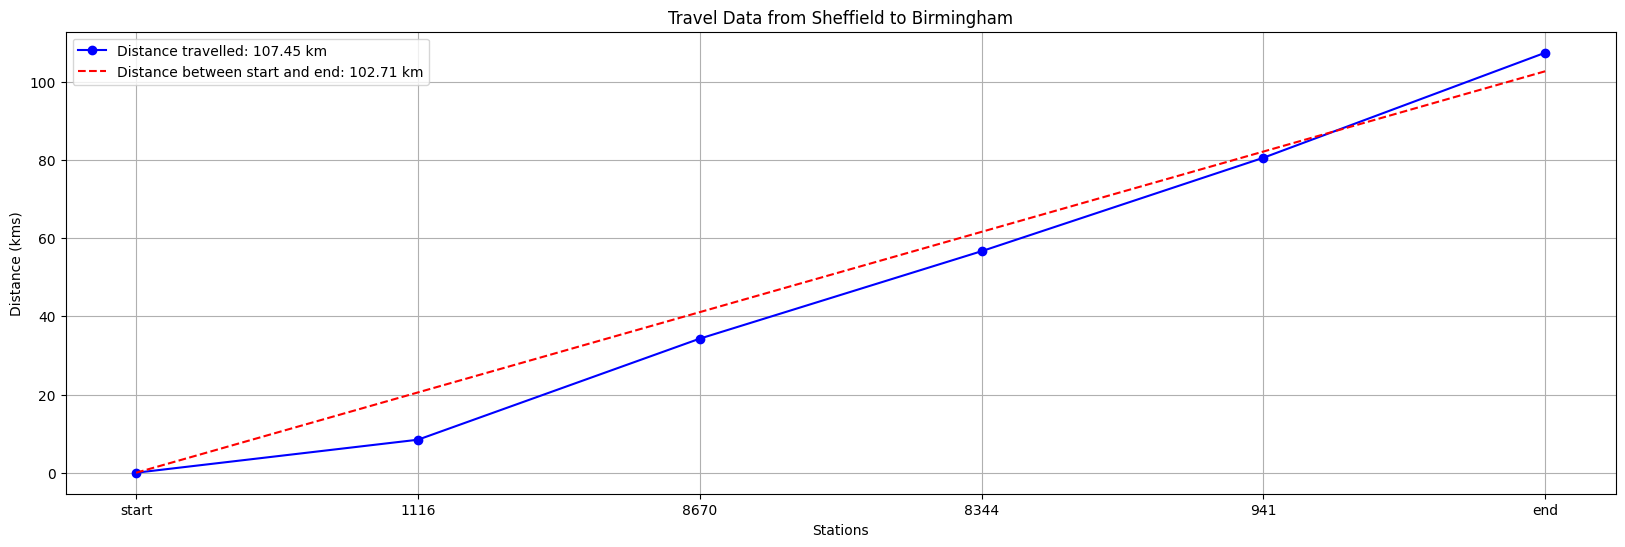

In [9]:
df = pd.DataFrame(data)
df['Point'] = df['Point'].astype(str)

# Calculate Cumulative Distance
df['Cumulative Distance'] = df['Distance'].cumsum()
d = df['Cumulative Distance'].iloc[-1]
# Calculate Haversine Distance from Start to End
start = (df['Latitude'].iloc[0], df['Longitude'].iloc[0])
end = (df['Latitude'].iloc[-1], df['Longitude'].iloc[-1])
haversine_distance = haversine(start[0], start[1], end[0], end[1])

# Plotting
plt.figure(figsize=(20, 6))

# Plot Cumulative Distance
plt.plot(df['Point'], df['Cumulative Distance'], marker='o', label=f'Distance travelled: {d:.2f} km', color='blue')

# Plot Haversine Distance
# Add a point for the start and end
plt.plot([df['Point'].iloc[0], df['Point'].iloc[-1]], [0, haversine_distance], color='red', linestyle='--', label=f'Distance between start and end: {haversine_distance:.2f} km')

plt.xlabel('Stations')
plt.ylabel('Distance (kms)')
plt.title(f'Travel Data from Sheffield to Birmingham')
plt.legend()
plt.grid(True)
plt.show()

Shortest distance: 107.45063524354428 km
Original Path: ['start', 1116, 8670, 8344, 941, 'end']
Shortest Path: ['start', 1116, 8670, 8344, 941, 'end']


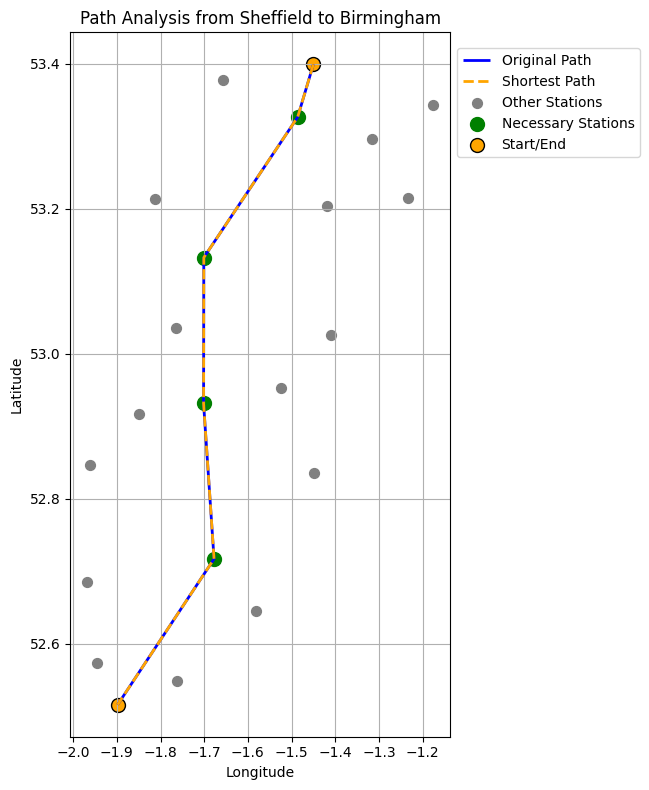

In [10]:
import math
import heapq
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, LineString

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    φ1 = math.radians(lat1)
    φ2 = math.radians(lat2)
    Δφ = math.radians(lat2 - lat1)
    Δλ = math.radians(lon2 - lon1)

    a = math.sin(Δφ / 2)**2 + math.cos(φ1) * math.cos(φ2) * math.sin(Δλ / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

def build_graph(data, stations):
    points = [(data["Latitude"][i], data["Longitude"][i], data["Point"][i]) for i in range(len(data["Point"]))]
    points.extend([(station["lat"], station["lon"], station["id"]) for station in stations])
    
    graph = {}
    for i in range(len(points)):
        lat1, lon1, id1 = points[i]
        for j in range(len(points)):
            if i != j:
                lat2, lon2, id2 = points[j]
                dist = haversine(lat1, lon1, lat2, lon2)
                
                if id1 in data["Point"] and id2 in data["Point"]:
                    idx1 = data["Point"].index(id1)
                    idx2 = data["Point"].index(id2)
                    discharge_distance = data["Discharge Distance"][idx1]
                    
                    if dist <= discharge_distance:
                        if id1 not in graph:
                            graph[id1] = []
                        graph[id1].append((dist, id2))
    
    return graph

def dijkstra(graph, start, end):
    queue = [(0, start, [])]
    seen = set()
    min_dist = {start: 0}
    
    while queue:
        (cost, node, path) = heapq.heappop(queue)
        
        if node in seen:
            continue
        
        path = path + [node]
        seen.add(node)
        
        if node == end:
            return cost, path
        
        for dist, neighbor in graph.get(node, []):
            if neighbor in seen:
                continue
            
            prev = min_dist.get(neighbor, None)
            next_cost = cost + dist
            if prev is None or next_cost < prev:
                min_dist[neighbor] = next_cost
                heapq.heappush(queue, (next_cost, neighbor, path))
    
    return float("inf"), []

def find_shortest_path(data, stations):
    graph = build_graph(data, stations)
    start = data["Point"][0]
    end = data["Point"][-1]
    return dijkstra(graph, start, end)

def extract_points(data, path):
    points = []
    for point in path:
        if isinstance(point, str) and point in data["Point"]:
            idx = data["Point"].index(point)
            points.append((data["Latitude"][idx], data["Longitude"][idx]))
        elif isinstance(point, int) and point in data["Point"]:
            idx = data["Point"].index(point)
            points.append((data["Latitude"][idx], data["Longitude"][idx]))
        else:
            for station in stations:
                if station["id"] == point:
                    points.append((station["lat"], station["lon"]))
                    break
    return points

def plot_paths(data, shortest_path, stations):
    original_path = [(data["Latitude"][i], data["Longitude"][i]) for i in range(len(data["Latitude"]))]
    shortest_path_points = extract_points(data, shortest_path)
    
    # Create GeoDataFrames
    original_path_geom = LineString([(lon, lat) for lat, lon in original_path])
    shortest_path_geom = LineString([(lon, lat) for lat, lon in shortest_path_points])
    
    gdf_original_path = gpd.GeoDataFrame(geometry=[original_path_geom], crs="EPSG:4326")
    gdf_shortest_path = gpd.GeoDataFrame(geometry=[shortest_path_geom], crs="EPSG:4326")
    
    # Stations GeoDataFrame
    stations_geom = [Point(station["lon"], station["lat"]) for station in stations]
    gdf_stations = gpd.GeoDataFrame(geometry=stations_geom, crs="EPSG:4326")
    
    # Include start and end points
    start_lat, start_lon = original_path[0]
    end_lat, end_lon = original_path[-1]
    gdf_start_end = gpd.GeoDataFrame(
        geometry=[Point(start_lon, start_lat), Point(end_lon, end_lat)],
        crs="EPSG:4326",
        data={'Type': ['Start', 'End']}
    )
    
    # Identify common stations between the original path and shortest path
    original_path_station_ids = set()
    for point in original_path:
        for station in stations:
            if math.isclose(point[0], station["lat"], abs_tol=0.0001) and math.isclose(point[1], station["lon"], abs_tol=0.0001):
                original_path_station_ids.add(station["id"])
    
    shortest_path_station_ids = set()
    for point in shortest_path_points:
        for station in stations:
            if math.isclose(point[0], station["lat"], abs_tol=0.0001) and math.isclose(point[1], station["lon"], abs_tol=0.0001):
                shortest_path_station_ids.add(station["id"])
    
    common_station_ids = original_path_station_ids.intersection(shortest_path_station_ids)
    
    # Add a new column to mark station status
    gdf_stations['Path Status'] = gdf_stations.index.to_series().apply(
        lambda idx: 'On Both Paths' if stations[idx]['id'] in common_station_ids
                    else ('On Original Path' if stations[idx]['id'] in original_path_station_ids 
                          else 'Not on Path')
    )
    
    # Filter GeoDataFrames for plotting
    gdf_on_original_path = gdf_stations[gdf_stations['Path Status'] == 'On Original Path']
    gdf_on_both_paths = gdf_stations[gdf_stations['Path Status'] == 'On Both Paths']
    
    # Plotting
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Plot the original path
    gdf_original_path.plot(ax=ax, color='blue', linestyle='-', linewidth=2, label='Original Path')
    
    # Plot the shortest path
    gdf_shortest_path.plot(ax=ax, color='orange', linestyle='--', linewidth=2, label='Shortest Path')
    
    # Plot all stations
    gdf_stations.plot(ax=ax, color='grey', markersize=50, label='Other Stations')
    
    # Highlight stations on the original path in red
    if not gdf_on_original_path.empty:
        gdf_on_original_path.plot(ax=ax, color='red', markersize=100, label='Unnecessary Stations')
    
    # Highlight common stations in green
    if not gdf_on_both_paths.empty:
        gdf_on_both_paths.plot(ax=ax, color='green', markersize=100, label='Necessary Stations')
    
    # Plot the start and end points
    gdf_start_end.plot(ax=ax, color='orange', markersize=100, edgecolor='black', label='Start/End')
    
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))  # Place legend outside the figure
    plt.title(f'Path Analysis from Sheffield to Birmingham')
    plt.grid(True)
    plt.tight_layout()  # Adjust layout to fit the figure and the legend
    plt.show()


shortest_distance, shortest_path = find_shortest_path(data, stations)
original_path = data["Point"]
print(f"Shortest distance: {shortest_distance} km")
print(f"Original Path: {original_path}")
print(f"Shortest Path: {shortest_path}")
plot_paths(data, shortest_path, stations)
